# This notebook is from a previous semester, the part of this semester is a continuation of this notebook

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [3]:
#Loading dataset
wineData = pd.read_csv(r'C:\Users\Aviva\Desktop\winequality-red.csv')
wineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#We can see that there are no null values
wineData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#  Let’s find out how the data columns affect the wine quality

1. The green graphs indicate an increase in the quality of the wine with the increase in the selected parameter.
2. The red graphs indicate an decrease in the quality of the wine with the decrease in the selected parameter.
3. The orange graphs indicate an influence that does not very help to classify the quality of the wine.

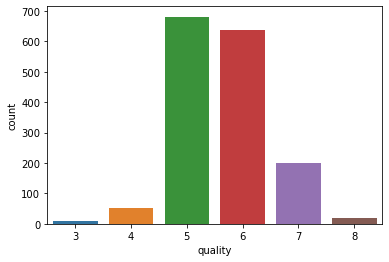

In [5]:
sns.countplot(x='quality', data=wineData)

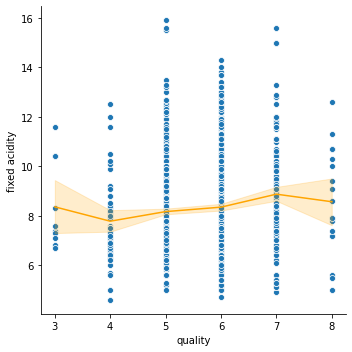

In [6]:
#Here we see that fixed acidity does not give any specification to classify the quality.
sns.relplot( data = wineData, x = 'quality', y = 'fixed acidity')
sns.lineplot(x = 'quality', y = 'fixed acidity', color='orange', data = wineData)

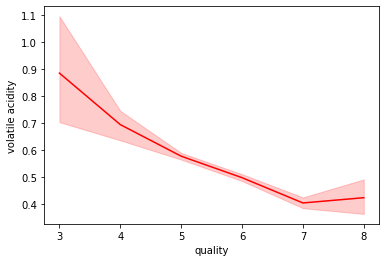

In [7]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
sns.lineplot(x = 'quality', y = 'volatile acidity', color='red', data = wineData)

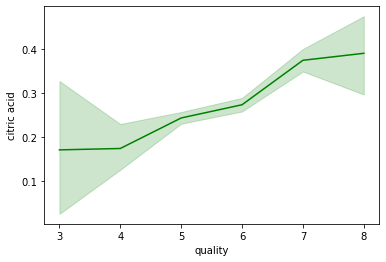

In [8]:
#Composition of citric acid go higher as we go higher in the quality of the wine
sns.lineplot(x = 'quality', y = 'citric acid', color='green', data = wineData)

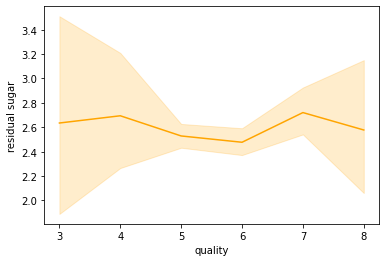

In [9]:
#Here we see that residual sugar does not help to classify the quality.
sns.lineplot(x = 'quality', y = 'residual sugar', color='orange', data = wineData)

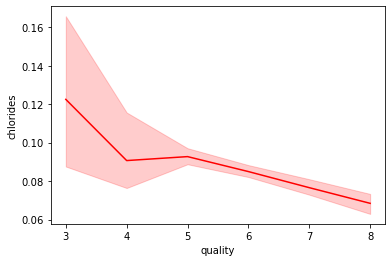

In [10]:
#Composition of chlorides also go down as we go higher in the quality of the wine
sns.lineplot(x = 'quality', y = 'chlorides', color='red', data = wineData)

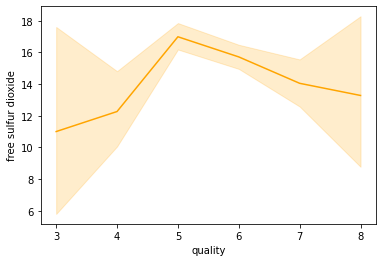

In [11]:
#Here we see that the amount of free sulfur dioxide does not help to classify the quality.
sns.lineplot(x = 'quality', y = 'free sulfur dioxide', color='orange', data = wineData)

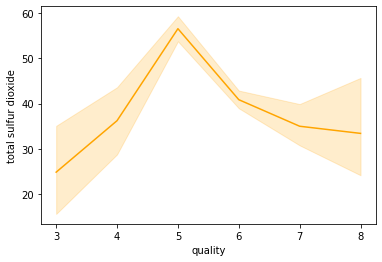

In [12]:
#Here we see that the amount of total sulfur dioxide does not help to classify the quality.
sns.lineplot(x = 'quality', y = 'total sulfur dioxide', color='orange', data = wineData)

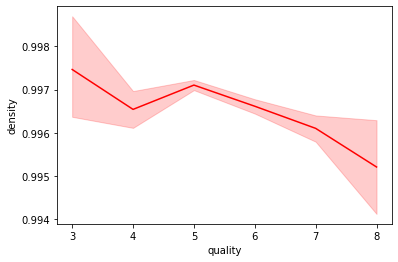

In [13]:
sns.lineplot(x = 'quality', y = 'density', color='red', data = wineData)

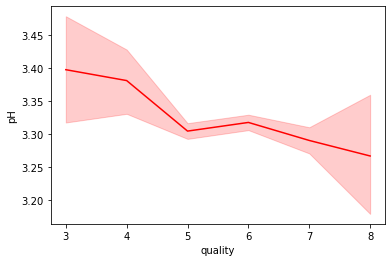

In [14]:
sns.lineplot(x = 'quality', y = 'pH', color='red', data = wineData)

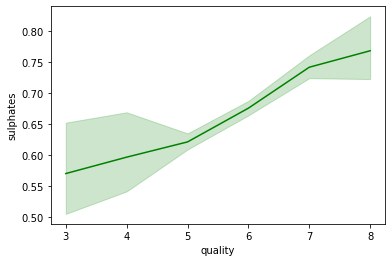

In [15]:
sns.lineplot(x = 'quality', y = 'sulphates', color='green', data = wineData)

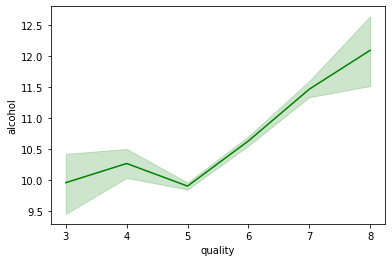

In [16]:
sns.lineplot(x = 'quality', y = 'alcohol', color='green', data = wineData)

# Preprocessing Data for performing Machine learning algorithms


In [4]:
#now we shall create a new column called Review. This column will contain the values of 0,1
#0 - Bad wine
#1 - Good wine
#This will be split in the following way. 
#1,2,3,4,5,6 --> Bad 
#7,8,9,10 --> Good
#Create an empty list called Reviews
reviews = []
for i in wineData['quality']:
    if i >= 1 and i <= 6:
        reviews.append('0')
    elif i >= 7 and i <= 10:
        reviews.append('1')
wineData['Reviews'] = reviews

#view final data
wineData.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Reviews'],
      dtype='object')

0    1382
1     217
Name: Reviews, dtype: int64

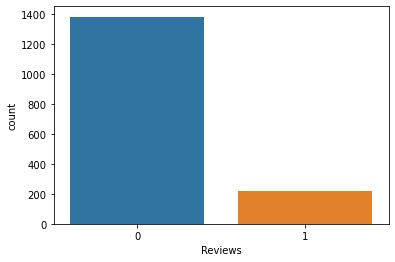

In [5]:
sns.countplot(x='Reviews', data=wineData)
wineData['Reviews'].value_counts()

In [6]:
#Now seperate the dataset as response variable and feature variabes
x = wineData.iloc[:,:11]
y = wineData['Reviews']

#Train and Test splitting of data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [7]:
#Applying Standard scaling to get optimized result
#I chose to use StandardScaler because it is less affected by outliers (less than Normalization)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
print(x_test.shape, y_test.shape)
print(x_train.shape, y_train.shape)
x_train

(400, 11) (400,)
(1199, 11) (1199,)


array([[ 1.97418149, -0.23260309,  1.11458849, ..., -0.78641859,
        -1.3131938 , -1.15257747],
       [ 0.28189382,  0.37802632,  0.09088663, ...,  0.3161036 ,
        -0.97064635, -1.24703683],
       [-0.71013687,  0.32251456, -1.39348108, ...,  0.70522908,
        -0.62809889,  1.01998773],
       ...,
       [-0.65178213,  0.48904985, -1.08637052, ...,  1.28891729,
        -0.68519014, -0.8691994 ],
       [-0.2432989 , -1.84244427,  0.39799719, ...,  0.05668661,
         0.79918216,  1.39782516],
       [-1.46874859, -1.34283839, -0.06266865, ...,  0.51066634,
        -0.68519014,  2.90917487]])

# Our training and testing data is ready now to perform machine learning algorithm

Text(0, 0.5, 'Testing Accuracy')

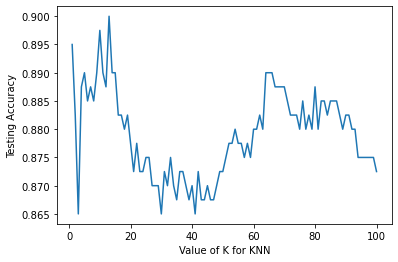

In [21]:
# try K=1 through K=100 for comparison
k_range = list(range(1, 101))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
   

#### We will now refine the search to the appropriate K

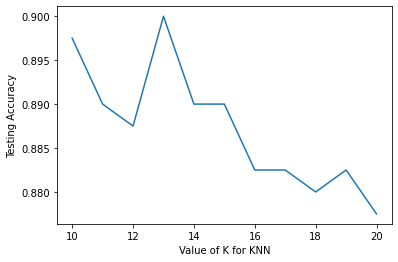

In [22]:
# try K=10 through K=20 for comparison
k_range = list(range(10, 21))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
y_pred = knn.predict(x_test)

 #### Let's see an Confusion matrix of K = 13

K = 13
Accuracy =  0.9


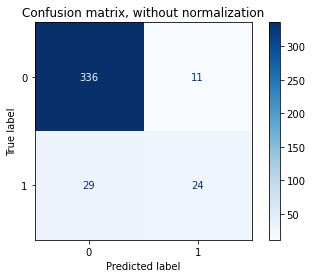

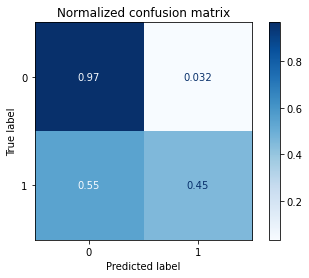

In [73]:
knn13 = KNeighborsClassifier(n_neighbors=13)
knn13.fit(x_train, y_train)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn13, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
y_pred = knn13.predict(x_test)
print("K = 13")
Accuracy_of_k_13 = metrics.accuracy_score(y_test, y_pred)
print("Accuracy = ",Accuracy_of_k_13)
plt.show()

#### Let's see an ROC curve  of K = 13

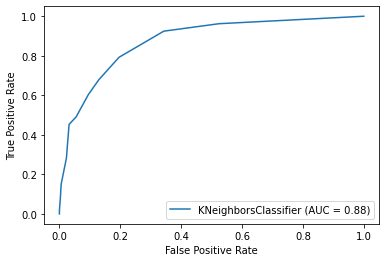

In [24]:
ROC_of_K_13 =  metrics.plot_roc_curve(knn13,x_test, y_test)

## We will now test whether the model is better than Dummy Classifier

- It can be seen that the KNN model is slightly better than the Dummy Classifier

Accuracy of Dummy Classifier =  0.8675


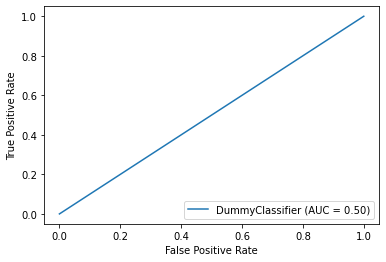

In [25]:
dummy = DummyClassifier(strategy="prior") #'prior' is the best model
dummy.fit(x_train, y_train)
y_pred = dummy.predict(x_test)
Accuracy_of_Dummy_Classifier = metrics.accuracy_score(y_test, y_pred)
ROC_of_Dummy_Classifier = metrics.plot_roc_curve(dummy,x_test, y_test)
print("Accuracy of Dummy Classifier = ",Accuracy_of_Dummy_Classifier)

### We will now try to improve the model by clearing data that less affects the quality of the wine (the orange data above)

- It can be seen that the deletion of the data did harm, so we will not delete it.

In [26]:
new_wineData = wineData.drop(['fixed acidity','free sulfur dioxide','total sulfur dioxide','residual sugar'], axis=1)
new_wineData

,volatile acidity,citric acid,chlorides,density,pH,sulphates,alcohol,quality,Reviews
0,0.700,0.00,0.076,0.99780,3.51,0.56,9.4,5,0
1,0.880,0.00,0.098,0.99680,3.20,0.68,9.8,5,0
2,0.760,0.04,0.092,0.99700,3.26,0.65,9.8,5,0
3,0.280,0.56,0.075,0.99800,3.16,0.58,9.8,6,0
4,0.700,0.00,0.076,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...
1594,0.600,0.08,0.090,0.99490,3.45,0.58,10.5,5,0
1595,0.550,0.10,0.062,0.99512,3.52,0.76,11.2,6,0
1596,0.510,0.13,0.076,0.99574,3.42,0.75,11.0,6,0
1597,0.645,0.12,0.075,0.99547,3.57,0.71,10.2,5,0


(400, 7) (400, 7)
(1199, 7) (1199, 7)
K = 2
Best accuracy of 'new_wineData' =  0.8875


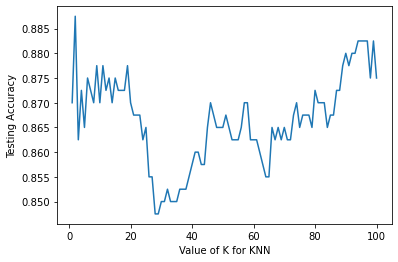

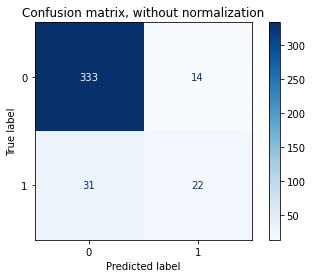

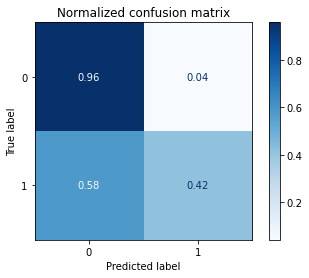

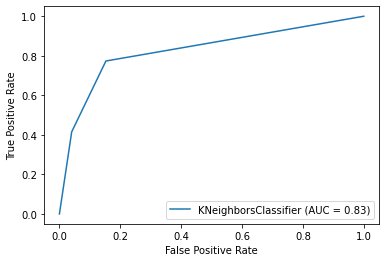

In [27]:
#Now seperate the dataset as response variable and feature variabes
x_new = new_wineData.iloc[:,:7]
y_new = new_wineData['Reviews']

#Train and Test splitting of data 
x_trainNew, x_testNew, y_trainNew, y_testNew = train_test_split(x_new, y_new, test_size = 0.25, random_state = 42)

#Applying Standard scaling to get optimized result
#I chose to use StandardScaler because it is less affected by outliers (less than Normalization)
sc = StandardScaler()
x_trainNew = sc.fit_transform(x_trainNew)
x_testNew = sc.fit_transform(x_testNew)
print(x_testNew.shape, x_testNew.shape)
print(x_trainNew.shape, x_trainNew.shape)


# try K=1 through K=100 for comparison
k_range = list(range(1, 101))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_trainNew, y_trainNew)
    y_predNew = knn.predict(x_testNew)
    scores.append(metrics.accuracy_score(y_testNew, y_predNew))

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
   
   
    
#fit the model to k=2, because it's the optimal K for the reduced data
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_trainNew, y_trainNew)

#Confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn, x_testNew, y_testNew,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)


#ROC
ROC_of_k_2_cleanData = metrics.plot_roc_curve(knn,x_testNew, y_testNew)

#Accuracy
y_predNew = knn.predict(x_testNew)
Accuracy_of_k_2_cleanData = metrics.accuracy_score(y_testNew, y_predNew)

print("K = 2")
print("Best accuracy of 'new_wineData' = ",Accuracy_of_k_2_cleanData)
plt.show()
knn_cleanData = knn 

# Decision Tree Classifier

In [28]:
#DecisionTreeClassifier by is default

DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.8825

max_features select = 11


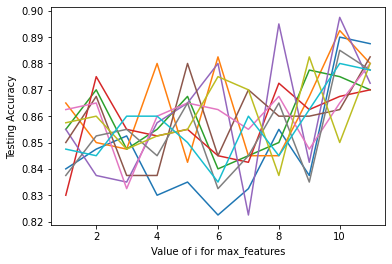

In [29]:
#Let's find the optimal max_features 
#(=The number of features to consider when looking for the best split). 
i_range = list(range(1, 12))
for i in range(1,11):
    scores = []
    for i in i_range:
        DT = DecisionTreeClassifier(max_features=i)
        DT.fit(x_train,y_train)
        y_pred = DT.predict(x_test)
        scores.append(metrics.accuracy_score(y_test, y_pred))
    # plot the relationship between i and testing accuracy
    plt.plot(i_range, scores)
    plt.xlabel('Value of i for max_features')
    plt.ylabel('Testing Accuracy')
print("max_features select = 11")

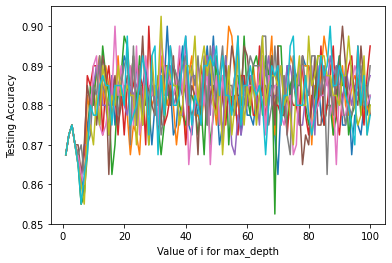

In [30]:
#Let's find the optimal max_depth 
i_range = list(range(1, 101))
for i in range(1,11):
    scores = []
    for i in i_range:
        DT = DecisionTreeClassifier(max_depth=i)
        DT.fit(x_train,y_train)
        y_pred = DT.predict(x_test)
        scores.append(metrics.accuracy_score(y_test, y_pred))
    # plot the relationship between i and testing accuracy
    plt.plot(i_range, scores)
    plt.xlabel('Value of i for max_depth')
    plt.ylabel('Testing Accuracy')

It can be seen that after around 12 pat the model does not improve much and this may result to over fitting
max_depth select = 11


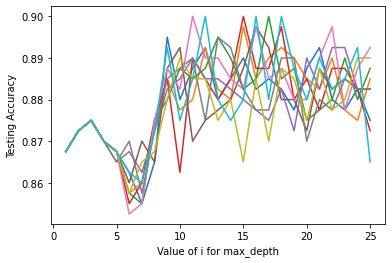

In [31]:
#We will now refine the search to the optimal max_depth 
i_range = list(range(1, 26))
for i in range(1,11):
    scores = []
    for i in i_range:
        DT = DecisionTreeClassifier(max_depth=i)
        DT.fit(x_train,y_train)
        y_pred = DT.predict(x_test)
        scores.append(metrics.accuracy_score(y_test, y_pred))
    # plot the relationship between i and testing accuracy
    plt.plot(i_range, scores)
    plt.xlabel('Value of i for max_depth')
    plt.ylabel('Testing Accuracy')
print("It can be seen that after around 12 pat the model does not improve much and this may result to over fitting")
print("max_depth select = 11")

Text(0, 0.5, 'Testing Accuracy')

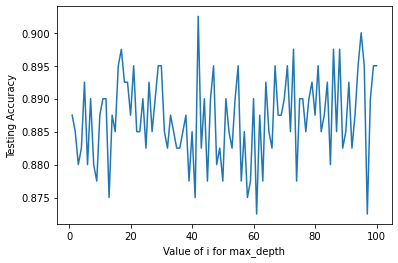

In [32]:
#Let's find the optimal random_state

i_range = list(range(1, 101))
scores = []
for i in i_range:
    DT = DecisionTreeClassifier(max_features=11, max_depth=11, random_state=i) 
    DT.fit(x_train,y_train)
    y_pred = DT.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
# plot the relationship between i and testing accuracy
plt.plot(i_range, scores)
plt.xlabel('Value of i for max_depth')
plt.ylabel('Testing Accuracy')

random_state select = 42


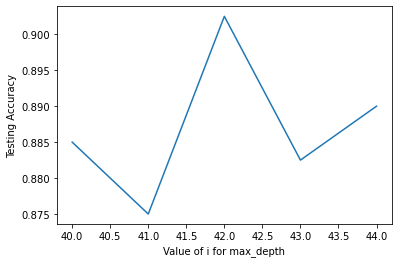

In [33]:
#We will now refine the search to the optimal random_state 

i_range = list(range(40, 45))
scores = []
for i in i_range:
    DT = DecisionTreeClassifier(max_features=11, max_depth=11, random_state=i) 
    DT.fit(x_train,y_train)
    y_pred = DT.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
# plot the relationship between i and testing accuracy
plt.plot(i_range, scores)
plt.xlabel('Value of i for max_depth')
plt.ylabel('Testing Accuracy')

print("random_state select = 42")

###  Let's see that the chosen Decision Tree

Accuracy of the optimal Decision Tree is:  0.9025


DecisionTreeClassifier(max_depth=11, max_features=11, random_state=42)

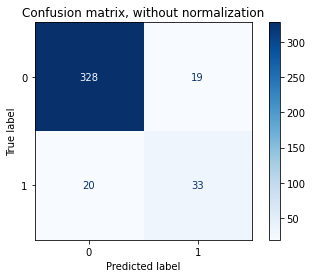

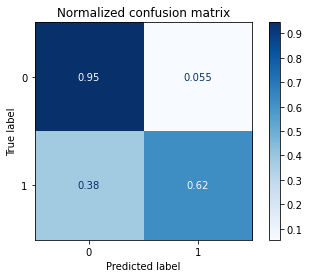

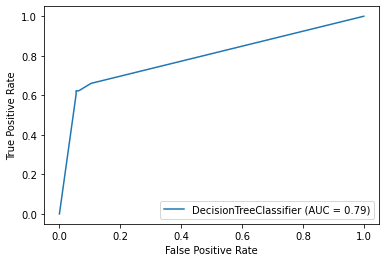

In [34]:
DT = DecisionTreeClassifier(max_features=11, max_depth=11, random_state=42)
DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)

#Confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(DT, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)



# ROC curve
ROC_of_DT_chosen =  metrics.plot_roc_curve(DT,x_test, y_test)

#Accuracy
Accuracy_of_DT_chosen = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of the optimal Decision Tree is: ",Accuracy_of_DT_chosen)
DT

# Let's try to improve the results of the models by using Cross-Validation

In [8]:
# create a cross-validation scheme
folds = KFold(n_splits = 10, shuffle = True, random_state = 42)


#### KNN with Cross-Validation

The optimal n_neighbors is: 69


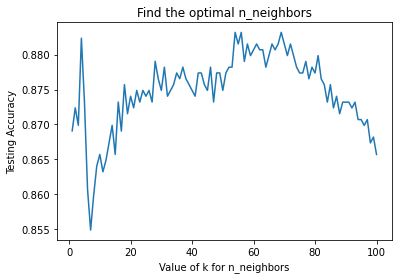

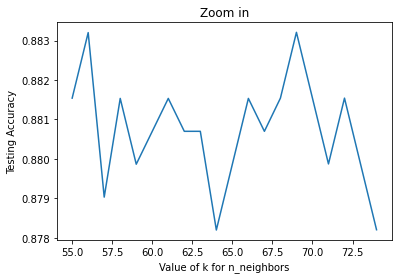

In [36]:
#Let's find the optimal k 

k_range = list(range(1, 101))
scores = []
for k in k_range:
    knn_CV = KNeighborsClassifier(n_neighbors=k)
    knn_CV.fit(x_train, y_train)
    scores.append(cross_val_score(knn_CV, x_train, y_train, cv=folds, scoring='accuracy').mean())

    
    
# plot the relationship between k and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of k for n_neighbors')
plt.ylabel('Testing Accuracy')
plt.title("Find the optimal n_neighbors")
print("The optimal n_neighbors is: 69" )
plt.show()


#let's get a zoom in
k_range = list(range(55, 75))
scores = []
for k in k_range:
    knn_CV = KNeighborsClassifier(n_neighbors=k)
    knn_CV.fit(x_train, y_train)
    scores.append(cross_val_score(knn_CV, x_train, y_train, cv=folds, scoring='accuracy').mean())

    
    
# plot the relationship between k and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of k for n_neighbors')
plt.ylabel('Testing Accuracy')
plt.title("Zoom in")
plt.show()

 #### Let's see that the KNN with Cross-Validation model

K = 69
Accuracy =  0.8875


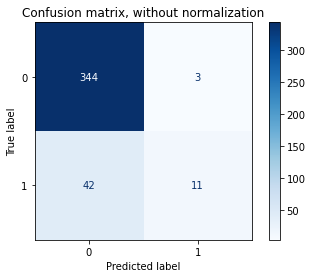

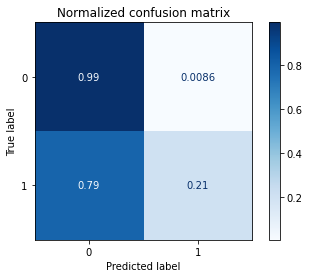

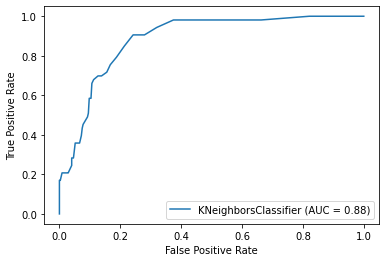

In [37]:
knn_CV = KNeighborsClassifier(n_neighbors=69)
knn_CV.fit(x_train, y_train)


#Let's see an Confusion matrix of K = 69
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn_CV, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    
y_pred = knn_CV.predict(x_test)
Accuracy_of_k_CV = metrics.accuracy_score(y_test, y_pred)
print("K = 69")
print("Accuracy = ",Accuracy_of_k_CV)
plt.show()



#Let's see an ROC curve  of K = 69
ROC_of_K_CV =  metrics.plot_roc_curve(knn_CV,x_test, y_test)
plt.show()

#### Decision Tree with Cross-Validation


The optimal max_dept is: 4


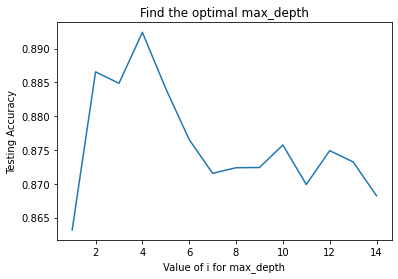

In [38]:
#Let's find the optimal max_depth 
i_range = list(range(1, 15))
scores = []
for i in i_range:
    DtCV = DecisionTreeClassifier(max_depth=i,random_state=1)
    DtCV.fit(x_train,y_train)
    scores.append(cross_val_score(DtCV, x_train, y_train, cv=folds, scoring='accuracy').mean())
    
    
# plot the relationship between i and testing accuracy
plt.plot(i_range, scores)
plt.xlabel('Value of i for max_depth')
plt.ylabel('Testing Accuracy')
plt.title("Find the optimal max_depth")
print("The optimal max_dept is: 4" )
plt.show()

The optimal max_features is: 11


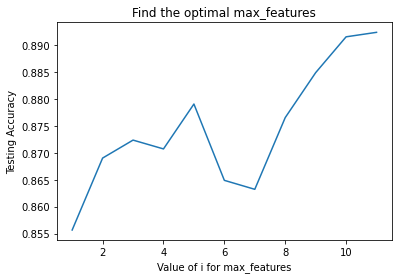

In [10]:
#Let's find the optimal max_features 
#(=The number of features to consider when looking for the best split). 
i_range = list(range(1, 12))
scores = []
for i in i_range:
    DtCV = DecisionTreeClassifier(max_depth=4,max_features=i,random_state=1)
    DtCV.fit(x_train,y_train)
    scores.append(cross_val_score(DtCV, x_train, y_train, cv=folds, scoring='accuracy').mean())
    
    
# plot the relationship between i and testing accuracy
plt.plot(i_range, scores)
plt.xlabel('Value of i for max_features')
plt.ylabel('Testing Accuracy')
plt.title("Find the optimal max_features")
print("The optimal max_features is: 11" )
plt.show()

#### Let's see that the chosen Decision Tree model with Cross-Validation

Accuracy of the optimal Decision Tree with Cross-Validation is:  0.87


DecisionTreeClassifier(max_depth=4, max_features=11, random_state=1)

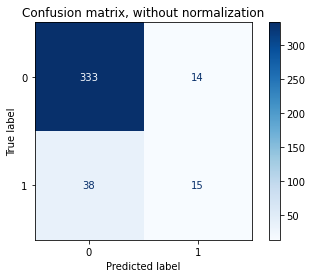

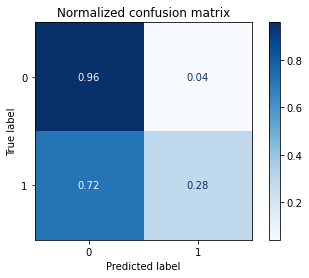

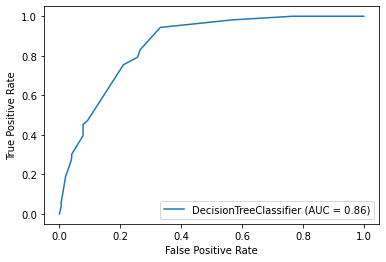

In [13]:
DT_CV = DecisionTreeClassifier(max_features=11, max_depth=4, random_state=1)
DT_CV.fit(x_train,y_train)
y_pred = DT_CV.predict(x_test)

#Confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(DT_CV, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)



# ROC curve
ROC_of_DT_CV_chosen =  metrics.plot_roc_curve(DT_CV,x_test, y_test)

#Accuracy
Accuracy_of_DT_CV_chosen = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of the optimal Decision Tree with Cross-Validation is: ",Accuracy_of_DT_CV_chosen)
DT_CV

# Final Results - Model Comparision

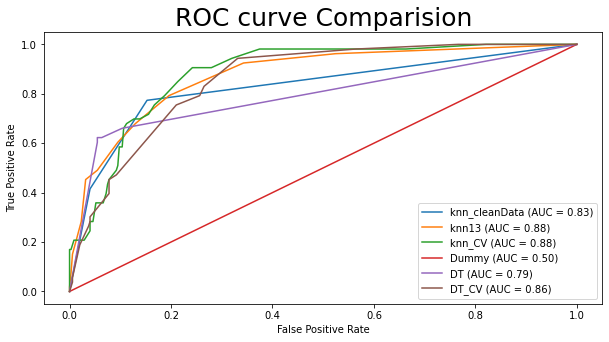

In [41]:
fig = plt.figure(figsize=(10,5))
ax = plt.gca()
metrics.plot_roc_curve(knn_cleanData, x_testNew, y_testNew, ax=ax,name="knn_cleanData")
metrics.plot_roc_curve(knn13, x_test, y_test, ax=ax,name="knn13")
metrics.plot_roc_curve(knn_CV, x_test, y_test, ax=ax,name="knn_CV")
metrics.plot_roc_curve(dummy, x_test, y_test, ax=ax,name="Dummy")
metrics.plot_roc_curve(DT, x_test, y_test, ax=ax,name="DT")
metrics.plot_roc_curve(DT_CV, x_test, y_test, ax=ax,name="DT_CV")
plt.title("ROC curve Comparision",fontsize=25)
plt.show()

Text(0.5, 1.0, 'AUC Comparision')

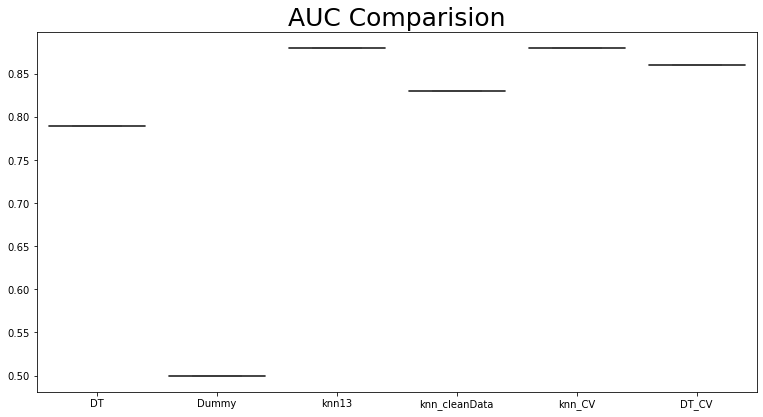

In [42]:
Models = ["DT", "Dummy", "knn13", "knn_cleanData","knn_CV","DT_CV"]
Accuracy = [0.79,0.5,0.88,0.83,0.88,0.86]

fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
x = Models
y = Accuracy
sns.boxplot(x=x, y=y)
plt.title("AUC Comparision",fontsize=25)

* We can see that Cross-Validation improved the AUC

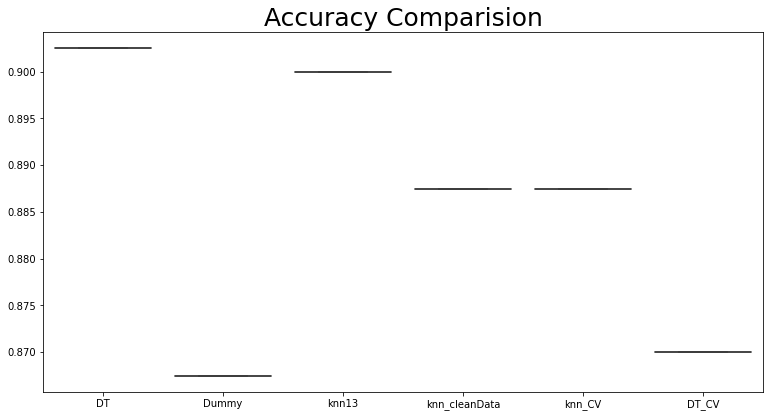

In [47]:
Models = ["DT", "Dummy", "knn13", "knn_cleanData","knn_CV","DT_CV"]
Accuracy = [Accuracy_of_DT_chosen,Accuracy_of_Dummy_Classifier,
            Accuracy_of_k_13,Accuracy_of_k_2_cleanData,Accuracy_of_k_CV,Accuracy_of_DT_CV_chosen]

fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
x = Models
y = Accuracy
sns.boxplot(x=x, y=y)
plt.title("Accuracy Comparision",fontsize=25)
plt.show()


* We can see that Cross-Validation isn't improved the Accuracy of models
* In addition, it can be seen that the DT_CV model is not a good model because it is almost like the Dummy

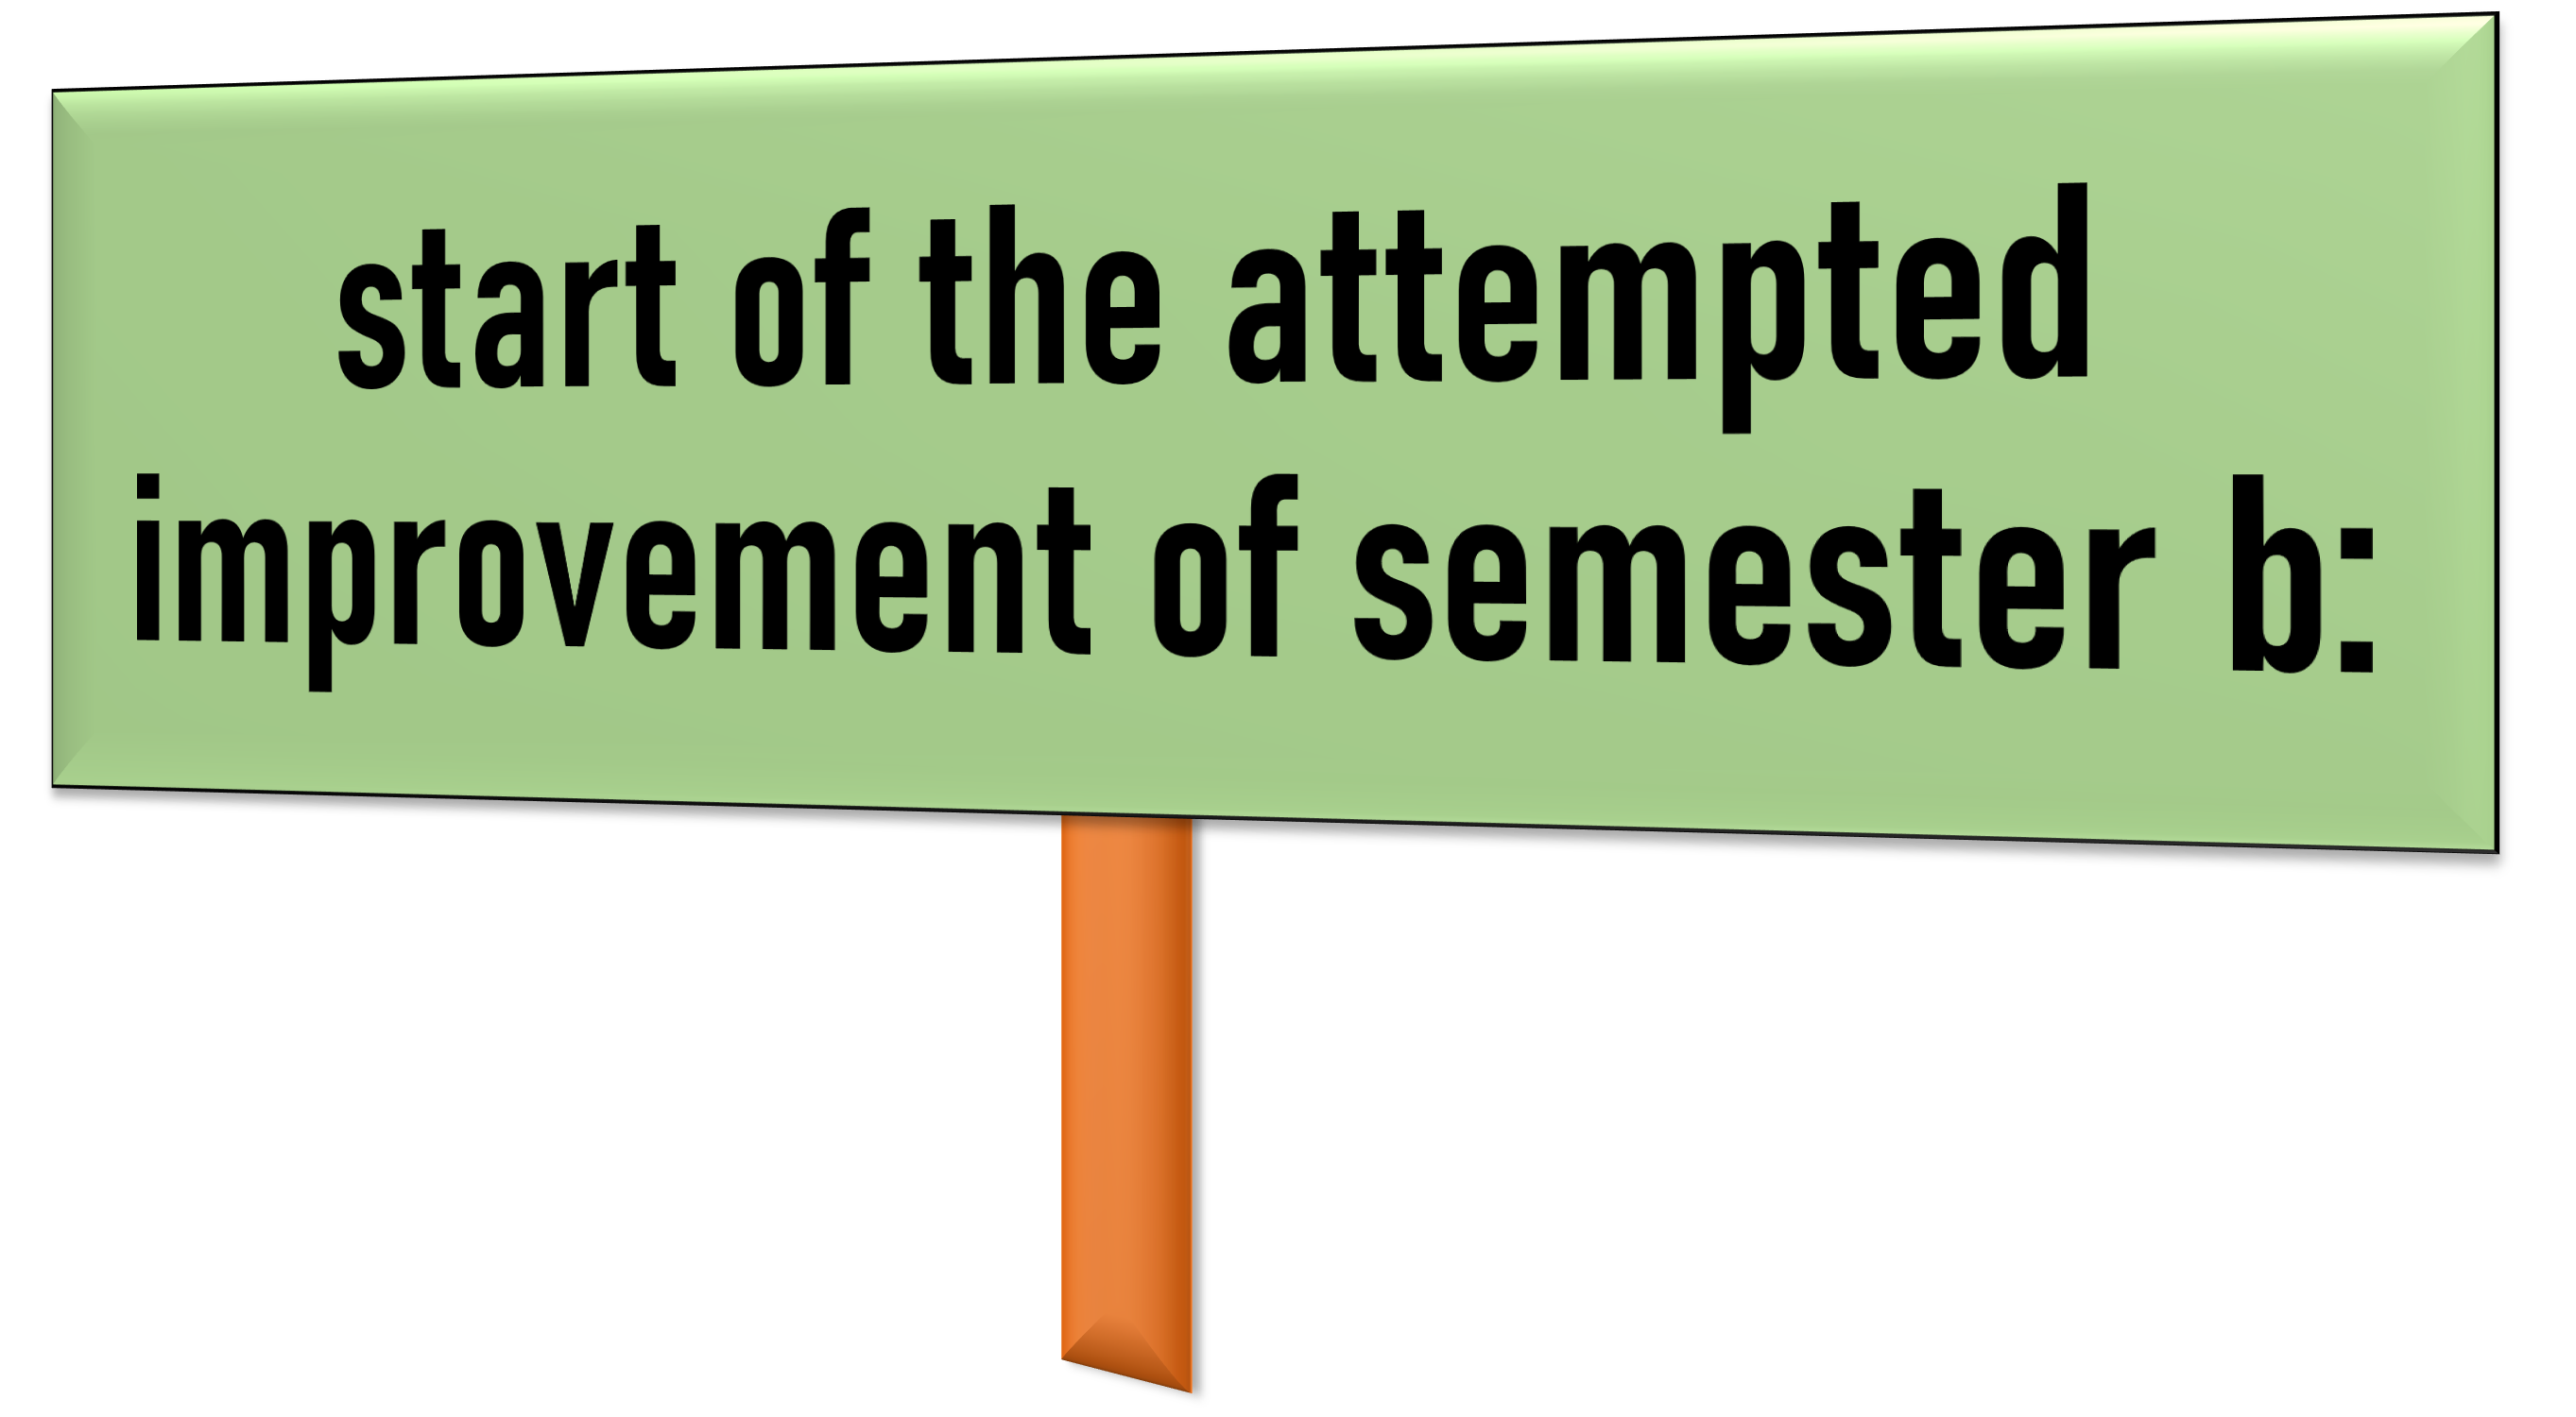

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier


In [3]:
classes = ['0', '1']

### Let's try Random Forest with PCA to get an interesting comparison to Decision Tree

In [51]:
#---------------Random Forest Classifier with PCA of retained variance of 0.95 i.e. 9 components in this case----------------

pipe_RF_PCA = Pipeline([
     ("pca", PCA(n_components=0.95, random_state=42)),
    ('rf_clf', RandomForestClassifier(random_state=0))
])

y_pred_RF_PCA = cross_val_predict(pipe_RF_PCA, x_train, y_train)

print(classification_report(y_train, y_pred_RF_PCA,
                                digits=4, target_names=classes))

#save the accuracy
accuracy_RF_PCA = accuracy_score(y_train,y_pred_RF_PCA)

              precision    recall  f1-score   support

           0     0.9097    0.9729    0.9402      1035
           1     0.6957    0.3902    0.5000       164

    accuracy                         0.8932      1199
   macro avg     0.8027    0.6816    0.7201      1199
weighted avg     0.8804    0.8932    0.8800      1199



Accuracy of Random Forest is:  0.9125


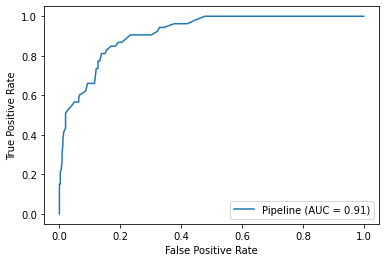

In [58]:
# Test of this Random Forest Classifier with the PCA:
pipe_RF_PCA.fit(x_train,y_train)
y_pred = pipe_RF_PCA.predict(x_test)


# ROC curve
ROC_of_RF_PCA =  metrics.plot_roc_curve(pipe_RF_PCA,x_test, y_test)

#Accuracy
Accuracy_of_RF_PCA = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest is: ",Accuracy_of_RF_PCA)
plt.show()

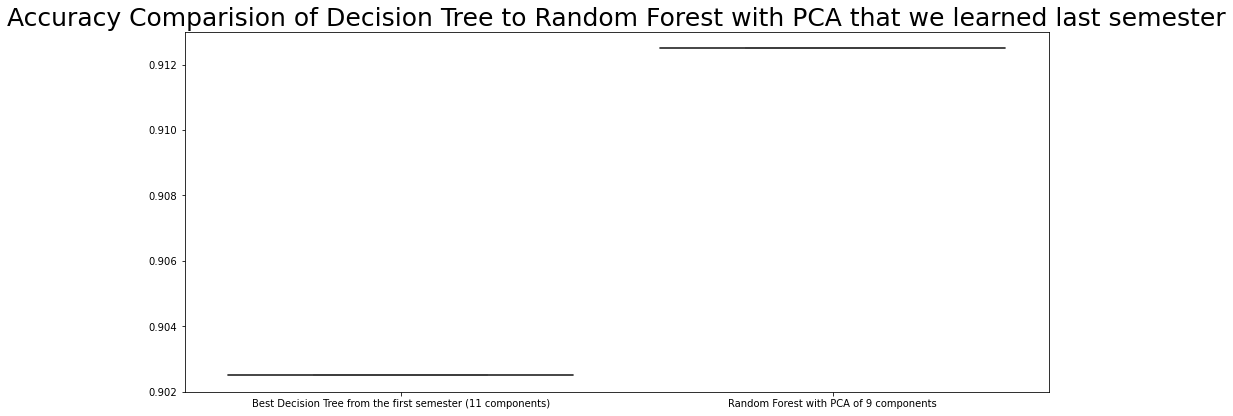

In [4]:
Models = ["Best Decision Tree from the first semester (11 components)", "Random Forest with PCA of 9 components"]
Accuracy = [0.9025, 0.9125]

fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
x = Models
y = Accuracy
sns.boxplot(x=x, y=y)
plt.title("Accuracy Comparision of Decision Tree to Random Forest with PCA that we learned last semester",fontsize=25)
plt.show()


Text(0.5, 1.0, 'AUC Comparision of Decision Tree to Random Forest with PCA that we learned last semester')

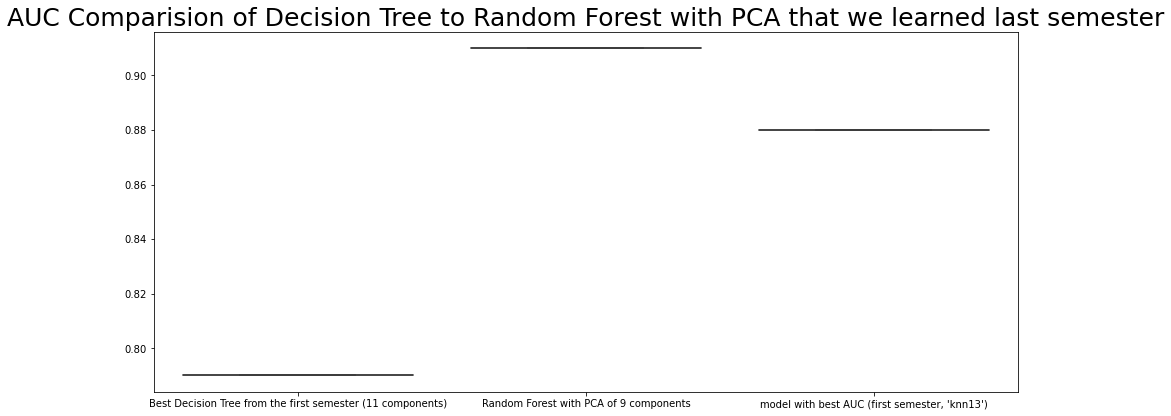

In [5]:
Models = ["Best Decision Tree from the first semester (11 components)", "Random Forest with PCA of 9 components", "model with best AUC (first semester, 'knn13')"]
Accuracy = [0.79,0.91,0.88]

fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
x = Models
y = Accuracy
sns.boxplot(x=x, y=y)
plt.title("AUC Comparision of Decision Tree to Random Forest with PCA that we learned last semester",fontsize=25)

* It can be seen that with the use of Random Forest and PCA we were able to improve the accuracy by 1 percent of accuracy and use 2 less dimensions.
* In addition, we also got a better AUC than in DT and even better than any other model from the first semester.
* Therefore it is definitely an improvement of the result.

## Attempt to improve using Voting Classifier

In [91]:
pipe_VOC_PCA = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
#     ("scale", StandardScaler()),
     ('voting_clf', VotingClassifier(
        estimators=[
            ('dt', DecisionTreeClassifier()),
            ('knn13', knn13),
             ('RF',RandomForestClassifier(random_state=0))
        ], voting='soft'))#, n_jobs=-1))
])

 
y_pred_VOC_PCA = cross_val_predict(pipe_VOC_PCA, x_train, y_train)

print(classification_report(y_train, y_pred_VOC_PCA,
                                digits=4, target_names=classes))

#save the accuracy
accuracy_VOC_PCA = accuracy_score(y_train,y_pred_VOC_PCA)

              precision    recall  f1-score   support

           0     0.9159    0.9575    0.9362      1035
           1     0.6239    0.4451    0.5196       164

    accuracy                         0.8874      1199
   macro avg     0.7699    0.7013    0.7279      1199
weighted avg     0.8760    0.8874    0.8792      1199



Accuracy of Random Forest is:  0.8775


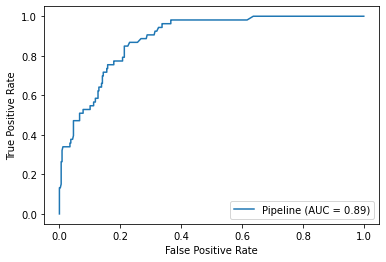

In [93]:
# Test of this VOC Classifier with the PCA:
pipe_VOC_PCA.fit(x_train,y_train)
y_pred = pipe_VOC_PCA.predict(x_test)


# ROC curve
ROC_of_VOC_PCA =  metrics.plot_roc_curve(pipe_VOC_PCA,x_test, y_test)

#Accuracy
Accuracy_of_VOC_PCA = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest is: ",Accuracy_of_VOC_PCA)

* It can be clearly seen that an ensemble of models gives a less good result than Random Forest alone

# In conclusion, using PCA and random forest we were able to improve our model in accuracy (90.25% to 91.25%) and AUC (0.88 to 0.91), in addition to reducing the dimensions of the model from 11 to 9.